In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import linalg
from scipy.optimize import fmin
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 6.0)
plt.rcParams['font.size'] = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for i in range(6):
    print("Starte mit Aufgabe %i nach spätestens %i Minuten!"% (i+1, 120/6*i))

Starte mit Aufgabe 1 nach spätestens 0 Minuten!
Starte mit Aufgabe 2 nach spätestens 20 Minuten!
Starte mit Aufgabe 3 nach spätestens 40 Minuten!
Starte mit Aufgabe 4 nach spätestens 60 Minuten!
Starte mit Aufgabe 5 nach spätestens 80 Minuten!
Starte mit Aufgabe 6 nach spätestens 100 Minuten!


## Aufgabe 1: Sums

In [3]:
S = lambda n_min, n_max: np.sum([ (-1)**n / abs( x + n * l)  for n in range(n_min, n_max + 1)])
x = 0.2
l = 1
genauigkeit = 1e-5
ergebnis = 3.53834
terme = 0

while abs( ergebnis - S(-terme, terme)) > genauigkeit:
    terme += 1
    
print("Es werden %i Terme benötigt." %terme)

Es werden 91458 Terme benötigt.


## Aufgabe 2: Zeros

Die Nullstellen liegen bei:
4.73004
7.85320
10.99561
14.13717
17.27876


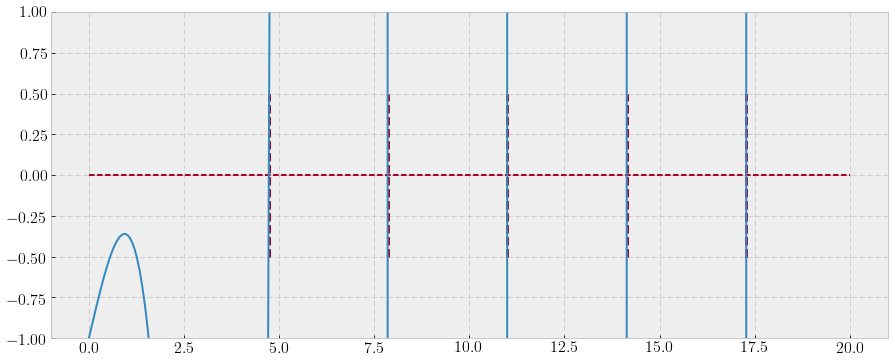

In [4]:
f = lambda x: np.cos(x) * np.sinh(x) - 1
grobe_schätzung = [4, 8, 11, 14, 17]

nullstellen = [] 
for x_0 in grobe_schätzung:
    nullstellen.append(fmin(lambda x: abs(f(x)), x_0, disp=0))
print("Die Nullstellen liegen bei:")
for i in nullstellen:
    print("%.5f"%i[0])
    
x = np.linspace(0,20,300)
plt.plot(x, f(x))
plt.vlines(nullstellen, -.5, .5, linestyles = "--", lw = 3, colors = "C1")
plt.hlines(0,0,20, linestyles="--", colors = "C1")
plt.ylim(-1,1)
plt.show()

## Aufgabe 3: Ordinary differential equation

Bei t = 4 ergibt sich eine Position von x = -0.775 und eine Geschwindigkeit von x' = v = 0.588
Ich habe odeint von scipy.integrate benutzt es benutzt lsoda von der FORTRAN library odepack.        
 Dabei habe ich 500 Zeitschritte benutzt.


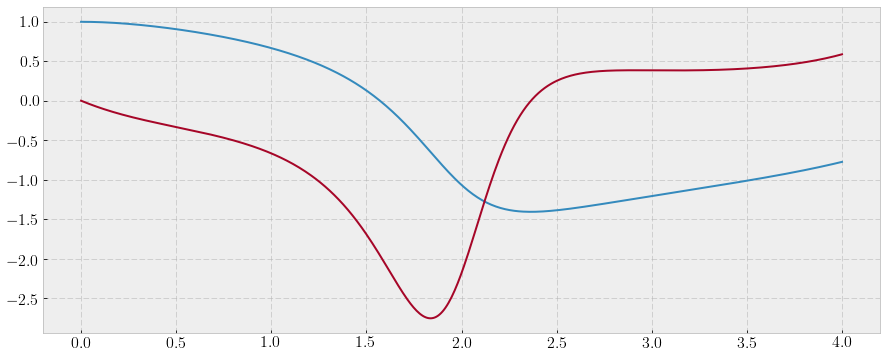

In [7]:
def fun(y, t):
    x0, x1 = y
    df = [x1, -(4 * x0**2 - 2) * x1 - x0**5 + 2 * x0**3 - 2*x0]
    return df
steps = 500
t = np.linspace(0, 4, steps)
y_0 = [1,0]
l = odeint(fun, y_0, t)
t_4 = (abs(t-4)).argmin()

print("Bei t = %.0f ergibt sich eine Position von x = %.3f und eine Geschwindigkeit von x' = v = %.3f" %( t[t_4], l[t_4,0], l[t_4,1]))
print("Ich habe odeint von scipy.integrate benutzt es benutzt lsoda von der FORTRAN library odepack.  \
      \n Dabei habe ich %i Zeitschritte benutzt."%steps)
plt.plot(t, l)
plt.show()

## Aufgabe 4: Quantum eigenvalues

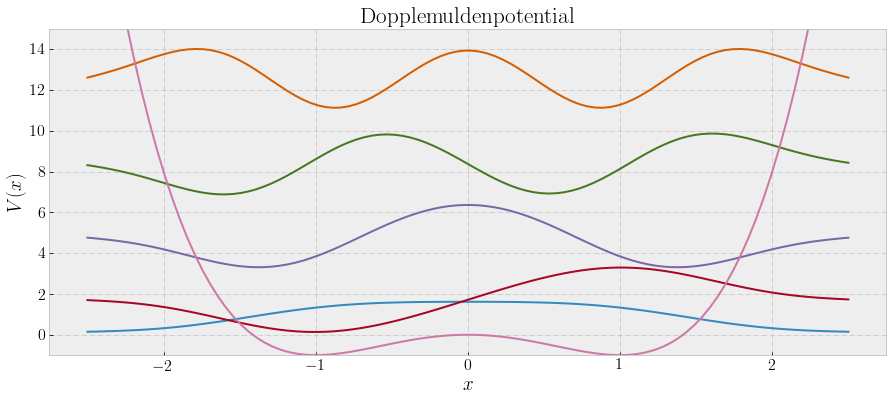

Ich habe als Methode die Diskretisierung des Raumes benutzt (Finite-Differenzen-Methoden).        
 Die Diskretisierung der zweiten Ableitung erfolgt mit den zentralen Differenzenquotienten der zweiten Ableitung        
 Die Genauigkeit dieser Methode habe ich mit dem Potential der harmonischen Oszillators verifiziert.        
 Dessen analytische Lösung bekannt ist.


In [8]:
def dif2_matrix(x,dx):
    dif_now = np.diag(np.ones(len(x))) * -2
    dif_pre_ones = np.ones(len(x)-1)
    dif_pre = np.diag(dif_pre_ones, k=-1)
    dif_post_ones = np.ones(len(x)-1)
    dif_post = np.diag(dif_post_ones, k=1)     
    dif  =  dif_now + dif_pre + dif_post
    dif /= dx**2
    return dif

def potential_matrix(x):
    V_matrix = np.eye(len(x))
    for i in range(len(x)):
        V_matrix[i,i] *=  V(x[i])
    return V_matrix
    
def plot():
    for i in range(N_evs):
        plt.plot(x, ev[:,i] * 10 + ew[i])  
    plt.plot(x, V(x))
    plt.ylim(-1, 15)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$V(x)$')
    plt.title("Dopplemuldenpotential")
    plt.show()
    
V = lambda x: x**4 - 2 * x**2
x = np.linspace(-2.5,2.5, 100)
dx = x[1] - x[0]
N_evs = 5

H = -dif2_matrix(x, dx) + potential_matrix(x)
ew, ev = linalg.eigh(H)

plot()
print("Ich habe als Methode die Diskretisierung des Raumes benutzt (Finite-Differenzen-Methoden). \
       \n Die Diskretisierung der zweiten Ableitung erfolgt mit den zentralen Differenzenquotienten der zweiten Ableitung \
       \n Die Genauigkeit dieser Methode habe ich mit dem Potential der harmonischen Oszillators verifiziert. \
       \n Dessen analytische Lösung bekannt ist.")

## Aufgabe 5: Matrix inversion

In [2]:
A = np.array( [[10, -7, 0],
               [-3,  2, 6],
               [ 5, -1, 5]] )
b = np.array( [7.1, 3.9, 6] )
x = np.linalg.lstsq(A, b)[0]
r = abs(np.dot(A, x) - b)
con = np.linalg.cond(A)
print("x = ", x)
print("Residual r = ", r)
print("condition: ", con)

x =  [ 0.01225806 -0.99677419  0.9883871 ]
Residual r =  [  4.44089210e-15   4.44089210e-16   4.44089210e-15]
condition:  9.40695646568
